In [81]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.datasets import load_boston
%matplotlib inline

In [82]:
boston = load_boston()

In [83]:
bostonDF = pd.DataFrame(data=boston.data, columns=boston.feature_names)
bostonDF["PRICE"] = boston.target

In [84]:
print(bostonDF.shape)

bostonDF.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


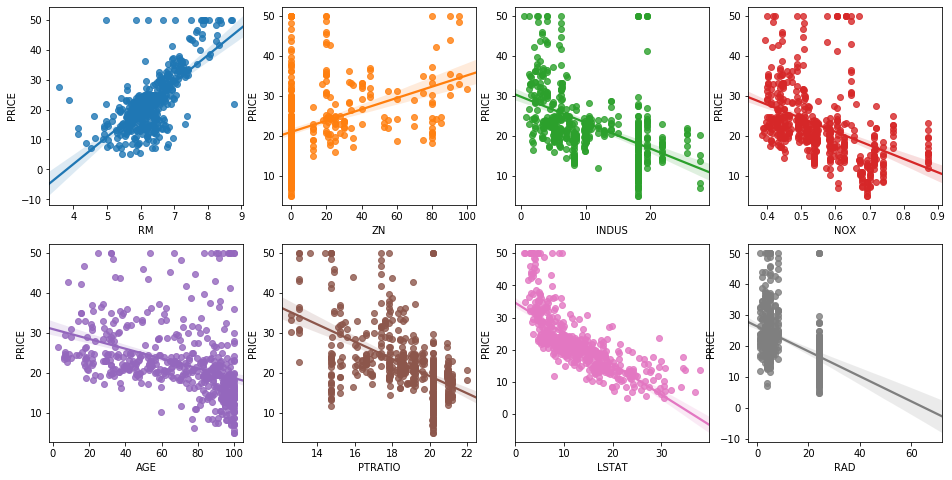

In [85]:
fig, axs = plt.subplots(figsize=(16, 8), ncols=4, nrows=2)
lm_features = ["RM", "ZN", "INDUS", "NOX", "AGE", "PTRATIO", "LSTAT", "RAD"]
for i, feature in enumerate(lm_features):
    row = int(i/4)
    col = i%4
    
    sns.regplot(x=feature, y="PRICE", data=bostonDF, ax=axs[row][col])

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [87]:
y=bostonDF["PRICE"]
x = bostonDF.drop(columns=["PRICE"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=156)

In [88]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [89]:
y_preds = lr.predict(x_test)

mse = mean_squared_error(y_test, y_preds)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_preds)

print("MSE: {0: .3f}, RMSE: {1: .3f}".format(mse, rmse))
print("Variance score: {0: .3f}".format(r2))

MSE:  17.297, RMSE:  4.159
Variance score:  0.757


In [90]:
print("절편: ", lr.intercept_)
print("회귀 계수", np.round(lr.coef_, 1))

절편:  40.995595172164755
회귀 계수 [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


In [91]:
coeff = pd.Series(data=np.round(lr.coef_, 1), index=x.columns)
coeff.sort_values(ascending=False)

RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
B           0.0
TAX        -0.0
AGE         0.0
INDUS       0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

In [92]:
from sklearn.model_selection import cross_val_score, cross_validate, KFold, StratifiedKFold

neg_mse_scores = cross_val_score(lr, x, y, scoring="neg_mean_squared_error", cv = 5)
rmse_scores = np.sqrt(-1 * neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("개별 negative MSE Scores: ", np.round(neg_mse_scores, 2))
print("개별 RMSE scores: ", np.round(rmse_scores, 2))
print("평균 RMSE: {0: .3f}".format(avg_rmse))

개별 negative MSE Scores:  [-12.46 -26.05 -33.07 -80.76 -33.31]
개별 RMSE scores:  [3.53 5.1  5.75 8.99 5.77]
평균 RMSE:  5.829


In [93]:
from sklearn.metrics import make_scorer, r2_score, mean_squared_error

scoring = {
                    'r2' : make_scorer(r2_score), 
                    'mse' : make_scorer(mean_squared_error)
              }
kfold = KFold(n_splits=20, random_state=1, shuffle=True)

regression_evaluation = cross_validate(lr, x, y, scoring=scoring, cv = kfold)

In [94]:
r2 = regression_evaluation["test_r2"]
mse = regression_evaluation["test_mse"]

print("r2: ", np.round(r2, 2))
print("mse: ", np.round(mse, 2))

r2:  [0.63 0.84 0.71 0.86 0.88 0.83 0.43 0.44 0.66 0.88 0.77 0.62 0.74 0.72
 0.33 0.74 0.81 0.57 0.6  0.82]
mse:  [21.44 19.69 34.26 12.7  10.87  9.87 37.45 59.1   9.45 15.55 16.34 19.86
 10.55 23.64 48.1  30.19 22.74 46.72 13.56 13.7 ]


In [136]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.metrics import make_scorer, r2_score, mean_squared_error
from sklearn.model_selection import cross_validate, KFold
import numpy as np

In [137]:
kfold = KFold(n_splits=20, random_state=1, shuffle=True)

In [138]:
scoring = {
    "mse": make_scorer(mean_squared_error),
    "r2": make_scorer(r2_score)
}

In [158]:
lr = LinearRegression()
ri = Ridge()
la = Lasso()
el = ElasticNet()

In [159]:
result = cross_validate(ri, x, y, scoring=scoring, cv=kfold)

rmse = np.sqrt(result["test_mse"])
r2 = result["test_r2"]

print("Ridge")
print("Ridge RMSE: {0: .3f}".format(rmse.mean()))
print("Ridge r2: {0: .3f}".format(r2.mean()))

Lasso
Lasso RMSE:  4.688
Lasso r2:  0.694


In [141]:
result = cross_validate(la, x, y, scoring=scoring, cv=kfold)

rmse = np.sqrt(result["test_mse"])
r2 = result["test_r2"]

print("Lasso")
print("Lasso RMSE: {0: .3f}".format(rmse.mean()))
print("Lasso r2: {0: .3f}".format(r2.mean()))

Lasso
Lasso RMSE:  5.161
Lasso r2:  0.647


In [142]:
result = cross_validate(el, x, y, scoring=scoring, cv=kfold)

rmse = np.sqrt(result["test_mse"])
r2 = result["test_r2"]

print("ElasticNet")
print("ElasticNet RMSE: {0: .3f}".format(rmse.mean()))
print("ElasticNet r2: {0: .3f}".format(r2.mean()))

ElasticNet
ElasticNet RMSE:  5.119
ElasticNet r2:  0.652


In [143]:
result = cross_validate(lr, x, y, scoring=scoring, cv=kfold)

rmse = np.sqrt(result["test_mse"])
r2 = result["test_r2"]

print("LinearRegression")
print("LinearRegression RMSE: {0: .3f}".format(rmse.mean()))
print("LinearRegression r2: {0: .3f}".format(r2.mean()))

LinearRegression
LinearRegression RMSE:  4.689
LinearRegression r2:  0.694


In [160]:
xlog = np.log1p(x)

         CRIM        ZN     INDUS  CHAS       NOX        RM       AGE  \
0    0.006300  2.944439  1.196948   0.0  0.430483  2.024853  4.192680   
1    0.026944  0.000000  2.088153   0.0  0.384582  2.004314  4.380776   
2    0.026924  0.000000  2.088153   0.0  0.384582  2.102303  4.128746   
3    0.031857  0.000000  1.156881   0.0  0.377066  2.079192  3.845883   
4    0.066770  0.000000  1.156881   0.0  0.377066  2.097650  4.010963   
..        ...       ...       ...   ...       ...       ...       ...   
501  0.060747  0.000000  2.559550   0.0  0.452985  2.027227  4.249923   
502  0.044275  0.000000  2.559550   0.0  0.452985  1.962908  4.352855   
503  0.058986  0.000000  2.559550   0.0  0.452985  2.076437  4.521789   
504  0.103991  0.000000  2.559550   0.0  0.452985  2.053354  4.503137   
505  0.046320  0.000000  2.559550   0.0  0.452985  1.950187  4.404277   

          DIS       RAD       TAX   PTRATIO         B     LSTAT  
0    1.627278  0.693147  5.693732  2.791165  5.986201  1.

In [162]:
ri = Ridge(alpha=0.1)

result = cross_validate(ri, xlog, y, scoring=scoring, cv=kfold)

rmse = np.sqrt(result["test_mse"])
r2 = result["test_r2"]

print("Ridge")
print("Ridge RMSE: {0: .3f}".format(rmse.mean()))
print("Ridge r2: {0: .3f}".format(r2.mean()))

Ridge
Ridge RMSE:  4.258
Ridge r2:  0.751


In [163]:
ri = Ridge(alpha=0.1)

result = cross_validate(ri, x, y, scoring=scoring, cv=kfold)

rmse = np.sqrt(result["test_mse"])
r2 = result["test_r2"]

print("Ridge")
print("Ridge RMSE: {0: .3f}".format(rmse.mean()))
print("Ridge r2: {0: .3f}".format(r2.mean()))

Ridge
Ridge RMSE:  4.688
Ridge r2:  0.694


In [164]:
result = cross_validate(lr, xlog, y, scoring=scoring, cv=kfold)

rmse = np.sqrt(result["test_mse"])
r2 = result["test_r2"]

print("LinearRegression")
print("LinearRegression RMSE: {0: .3f}".format(rmse.mean()))
print("LinearRegression r2: {0: .3f}".format(r2.mean()))

LinearRegression
LinearRegression RMSE:  4.260
LinearRegression r2:  0.750
